# Analytics for Unstructured Data - Assignment 1
### Praneet Kumar Alamuri - pa22222
### Shreyansh Agrawal - sa55742
### Soumya Agrawal- sa55638
### Manvi Goyal - mg65952
### Vivek Dhulipala - vd6543

In [97]:
# Import packages necessary for the assignment

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
from selenium.webdriver.common.by import By
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import copy
from matplotlib import pyplot as plt
import re
import string
import sklearn.manifold
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Read the model to brand csv file

brands = pd.read_csv('car models and brands.csv')

brands

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx
...,...,...
525,volvo,xc90
526,volvo,s60
527,volvo,s80
528,volvo,v60


### URL used for the analysis -

### https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p1

In [5]:
# Initiating the Webdriver
driver = webdriver.Chrome('C:/Users/apk12/OneDrive/Documents/MSBA/Fall/Analytics for Unstructured Data/chromedriver')

page_counter=1
comment_counter = 1
dt_counter = 1
comment_list = []
dt_list = []
comments_to_scrape = 5000

while comment_counter <= comments_to_scrape:
    
    url = 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p'+str(page_counter)
    driver.get(url)
    
    comments_1 = driver.find_element(By.CLASS_NAME,'DataBox.DataBox-Comments')
    comments_2 = comments_1.find_elements(By.CLASS_NAME,'Message.userContent')
    dt = comments_1.find_elements(By.CLASS_NAME,'Meta.CommentMeta.CommentInfo')
    
    for b in comments_2:
        comment_list.append(b.text)
        comment_counter = comment_counter + 1
        
    for x in dt:
        dt_list.append(x.text)
        dt_counter = dt_counter + 1
    
    page_counter = page_counter+1
    
driver.quit()

In [6]:
# Dataframe with the scraped 5000 comments starting march 2002

df = pd.DataFrame()

df['dt'] = dt_list
df['comment'] = comment_list

df

,dt,comment
0,March 2002,I personally think that with a few tweaks the ...
1,March 2002,I am debating a new purchase and these two are...
2,March 2002,"Great handling, RWD, excellent engine and the ..."
3,March 2002,And no manual tranny. That may not matter to y...
4,March 2002,One beauty of BMW 3 Series is that there are s...
...,...,...
4995,January 2006,I agree with blueguydotcom. The IS350 is one f...
4996,January 2006,Don't have any interest in aftermarket tuners....
4997,January 2006,>Don't have any interest in aftermarket tuners...
4998,January 2006,AMG i have no use for...it's MB afterall. As f...


In [222]:
df.drop_duplicates()

,dt,comment
0,March 2002,I personally think that with a few tweaks the ...
1,March 2002,I am debating a new purchase and these two are...
2,March 2002,"Great handling, RWD, excellent engine and the ..."
3,March 2002,And no manual tranny. That may not matter to y...
4,March 2002,One beauty of BMW 3 Series is that there are s...
...,...,...
4995,January 2006,I agree with blueguydotcom. The IS350 is one f...
4996,January 2006,Don't have any interest in aftermarket tuners....
4997,January 2006,>Don't have any interest in aftermarket tuners...
4998,January 2006,AMG i have no use for...it's MB afterall. As f...


In [8]:
df_1 = copy.deepcopy(df)

df_1

,dt,comment
0,March 2002,I personally think that with a few tweaks the ...
1,March 2002,I am debating a new purchase and these two are...
2,March 2002,"Great handling, RWD, excellent engine and the ..."
3,March 2002,And no manual tranny. That may not matter to y...
4,March 2002,One beauty of BMW 3 Series is that there are s...
...,...,...
4995,January 2006,I agree with blueguydotcom. The IS350 is one f...
4996,January 2006,Don't have any interest in aftermarket tuners....
4997,January 2006,>Don't have any interest in aftermarket tuners...
4998,January 2006,AMG i have no use for...it's MB afterall. As f...


# Task A

In [82]:
# Function to replace \n with blanks('')
def replacenewline(x):
    return(str(x).replace('\n', ' '))

# Function to replace "\'" with blanks('')
def replaceapostrophe(z):
    return(str(z).replace("\'", ""))

# Function to tokenize each comment and output a list
def c(y):
    comment_tokens = word_tokenize(y)

    return comment_tokens
    
df_1['comment'] = df_1['comment'].apply(replacenewline)
df_1['comment'] = df_1['comment'].apply(replaceapostrophe)
df_1['list'] = df_1['comment'].apply(c)
df_1 = df_1[['comment','list']]

df_1

,comment,list
0,I personally think that with a few tweaks the ...,"[I, personally, think, that, with, a, few, twe..."
1,I am debating a new purchase and these two are...,"[I, am, debating, a, new, purchase, and, these..."
2,Great handling RWD excellent engine and the be...,"[Great, handling, RWD, excellent, engine, and,..."
3,And no manual tranny That may not matter to yo...,"[And, no, manual, tranny, That, may, not, matt..."
4,One beauty of BMW 3 Series is that there are s...,"[One, beauty, of, BMW, 3, Series, is, that, th..."
...,...,...
4995,I agree with blueguydotcom The IS350 is one fa...,"[I, agree, with, blueguydotcom, The, IS350, is..."
4996,Dont have any interest in aftermarket tuners T...,"[Dont, have, any, interest, in, aftermarket, t..."
4997,Dont have any interest in aftermarket tuners ...,"[Dont, have, any, interest, in, aftermarket, t..."
4998,AMG i have no use forits MB afterall As for M ...,"[AMG, i, have, no, use, forits, MB, afterall, ..."


#### Testing Zipf's law visually on a log-log plot for the top 100 words
#### We can see in the below plot that a negative linear trend is observed which validates Zipf's law

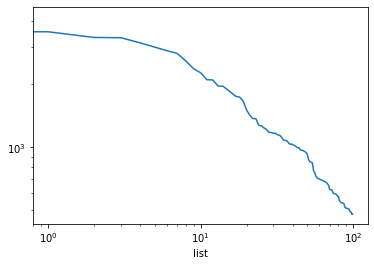

In [83]:
df_1.apply(pd.Series.explode).set_index('comment').reset_index().drop_duplicates()[['list']].value_counts()[:100].plot()
plt.xscale("log")
plt.yscale("log")
plt.show()

In [87]:
# Adding the rank column basis word freq to run a regression to validate Zipf's law econometrically
df_z = df_1.apply(pd.Series.explode).set_index('comment').reset_index().drop_duplicates()[['list']].value_counts()[:100].reset_index().rename(columns = {0:'freq','list':'token'})
df_z['rank'] = df_z['freq'].rank(ascending=False)
df_z

# Fitting the linear Regression plot to obtain the coeffcient (slope) of the above log-log plot
linear_fit = LinearRegression().fit(np.log10(df_z[['rank']]), np.log10(df_z[['freq']]))
print('The coefficient of the regression line between word frequency and rank on a log-log scale is',linear_fit.coef_[0][0])

The coefficient of the regression line between word frequency and rank on a log-log scale is -0.5888752406978591


### Since, we see a strong negative coefficient between frequency and rank, the Zipf's law holds here

# Task B

In [88]:
df_2 = copy.deepcopy(df)

df_2['comment'] = df_2['comment'].apply(str.lower)

# Function to replace \n with blanks('')
def replacenewline(x):
    return(str(x).replace('\n', ' '))

# Function to replace "\'" with blanks('')
def replaceapostrophe(z):
    return(str(z).replace("\'",""))

# Function to replace the model names with brand names of the car
def brand_replace(x):
    for i in brands.index.values:
        x = x.replace(brands['Model'][i].lower(),brands["Brand"][i].lower())
    return x

# Function to remove stop words and tokenize the comment
def sw(y):
    comment_tokens = word_tokenize(y)
    new_comment = []
    
    for i in comment_tokens:
        if i.lower() not in stopwords.words('english'):
            new_comment.append(i)
    
    return new_comment

df_2['comment'] = df_2['comment'].apply(replacenewline)
df_2['comment'] = df_2['comment'].apply(brand_replace)
df_2['comment'] = df_2['comment'].apply(replaceapostrophe)
df_2['new_comment_tokens'] = df_2['comment'].apply(sw)


df_2

,dt,comment,new_comment_tokens
0,March 2002,i personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,..."
1,March 2002,i am debating a new purchase and these two are...,"[debating, new, purchase, two, top, ltoyota, ...."
2,March 2002,"great handling, rwd, excellent engine and the ...","[great, handling, ,, rwd, ,, excellent, engine..."
3,March 2002,and no manual tranny. that may not matter to y...,"[manual, tranny, ., may, matter, ,, certainly,..."
4,March 2002,one beauty of bmw 3 series is that there are s...,"[one, beauty, bmw, 3, series, many, models, ch..."
...,...,...,...
4995,January 2006,i agree with blueguydotcom. the is350 is one f...,"[agree, blueguydotcom, ., is350, one, fast, ri..."
4996,January 2006,dont have any interest in aftermarket tuners. ...,"[dont, interest, aftermarket, tuners, ., 3.5, ..."
4997,January 2006,>dont have any interest in aftermarket tuners ...,"[>, dont, interest, aftermarket, tuners, consi..."
4998,January 2006,amg i have no use for...its mb afterall. as fo...,"[amg, use, ..., mb, afterall, ., ,, actual, di..."


In [90]:
# Getting a Dataframe with the 5000 Comments to brand mapping, where each brand is counted only once for the comment in question 
word_freq = df_2.apply(pd.Series.explode).set_index(['comment','dt']).reset_index().drop_duplicates()[['new_comment_tokens']]

# Removing non-brand words and displaying the top 10 words
word_freq[(word_freq['new_comment_tokens'] != 'problem')&(word_freq['new_comment_tokens'] != 'car')&(word_freq['new_comment_tokens'] != 'seat')&(word_freq['new_comment_tokens'] != 'sedan')&(word_freq['new_comment_tokens'].isin(brands['Brand'].drop_duplicates()))]['new_comment_tokens'].value_counts()[:10]

bmw              1369
acura             561
honda             423
audi              409
infiniti          391
toyota            308
nissan            297
mercedes-benz     228
subaru            207
volkswagen        172
Name: new_comment_tokens, dtype: int64

<AxesSubplot:>

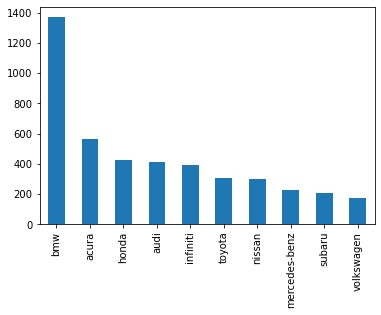

In [94]:
word_freq[(word_freq['new_comment_tokens'] != 'problem')&(word_freq['new_comment_tokens'] != 'car')&(word_freq['new_comment_tokens'] != 'seat')&(word_freq['new_comment_tokens'] != 'sedan')&(word_freq['new_comment_tokens'].isin(brands['Brand'].drop_duplicates()))]['new_comment_tokens'].value_counts()[:10].plot(kind='bar')

#### The above plot displays the top 10 brands.
#### NOTE - Each brand is counted only once for a comment, even in cases where the brand may be mentioned multiple times in the same comment

# Task C

In [100]:
#clasulating the lift values withing brands
def lift(n, a, b, ab):
    l = ((n*ab)/(a*b))
    return (l)

brands_10 = word_freq[(word_freq['new_comment_tokens'].isin(brands['Brand'].drop_duplicates()))&(word_freq['new_comment_tokens'] != 'problem')&(word_freq['new_comment_tokens'] != 'car')&(word_freq['new_comment_tokens'] != 'seat')&(word_freq['new_comment_tokens'] != 'sedan')]['new_comment_tokens'].value_counts()[:10].reset_index()['index'].copy()

lift_db = df_2.copy()
lift_db = lift_db.apply(pd.Series.explode).set_index(['comment','dt']).reset_index().drop_duplicates().copy()

lift_values = pd.DataFrame(columns=['word_1','word_2','lift_val'])

for x1 in brands_10:
    for x2 in brands_10:
        lift_db['x1'] = 0
        lift_db['x2'] = 0
        
        lift_db['x1'][lift_db['new_comment_tokens'] == x1] = 1
        lift_db['x2'][lift_db['new_comment_tokens'] == x2] = 1
        
        c = lift_db.groupby('comment')[['x1','x2']].sum().reset_index()   
        
        a = lift_db['x1'].sum()
        b = lift_db['x2'].sum()
        ab = c[(c['x1']==1) & (c['x2']==1)]['x1'].count()
        n = df_2['new_comment_tokens'].count()
        
        lift_val = lift(n, a, b, ab)
        
        app_dict = {}
        app_dict['word_1'] = x1
        app_dict['word_2'] = x2
        app_dict['lift_val'] = lift_val
        
        lift_values = lift_values.append(app_dict, ignore_index=True)
        
lift_values

C:\Users\apk12\AppData\Local\Temp\ipykernel_14524\3317132424.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lift_db['x1'][lift_db['new_comment_tokens'] == x1] = 1
C:\Users\apk12\AppData\Local\Temp\ipykernel_14524\3317132424.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lift_db['x2'][lift_db['new_comment_tokens'] == x2] = 1
C:\Users\apk12\AppData\Local\Temp\ipykernel_14524\3317132424.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,word_1,word_2,lift_val
0,bmw,bmw,3.652301
1,bmw,acura,1.510399
2,bmw,honda,1.269239
3,bmw,audi,1.732387
4,bmw,infiniti,1.970935
...,...,...,...
95,volkswagen,toyota,2.170794
96,volkswagen,nissan,2.93634
97,volkswagen,mercedes-benz,3.569971
98,volkswagen,subaru,2.527806


In [109]:
similarity = pd.crosstab(lift_values['word_1'], lift_values['word_2'], lift_values['lift_val'], aggfunc=np.mean)

similarity_1 = similarity.copy()

for i in range(len(similarity)):
    for j in range(len(similarity)):
        if j<=i :
            similarity_1.iloc[i,j]=''
        else:
            similarity_1.iloc[i,j] = similarity.iloc[i,j]
similarity_1

# Below is the Similarity Matrix

word_2,acura,audi,bmw,honda,infiniti,mercedes-benz,nissan,subaru,toyota,volkswagen
word_1,,,,,,,,,,
acura,,2.244507,1.510399,2.549483,3.031671,2.032711,2.220662,2.109759,1.823043,1.813622
audi,,,1.732387,1.445028,2.751393,3.699653,1.605295,1.653615,1.270124,4.690965
bmw,,,,1.269239,1.970935,1.890226,1.205136,1.182146,1.3874,1.507636
honda,,,,,1.420858,1.503463,3.860512,1.598885,3.952903,2.199131
infiniti,,,,,,2.467806,2.540322,1.853293,1.16252,2.230417
mercedes-benz,,,,,,,1.624431,1.271294,2.064821,3.569971
nissan,,,,,,,,1.626572,3.82614,2.93634
subaru,,,,,,,,,1.411632,2.527806
toyota,,,,,,,,,,2.170794


In [105]:
dissimilarity = pd.crosstab(lift_values['word_1'], lift_values['word_2'], 1/lift_values['lift_val'], aggfunc=np.mean)

dissimilarity_1 = dissimilarity.copy()

for i in range(len(dissimilarity)):
    for j in range(len(dissimilarity)):
        if j<=i :
            dissimilarity_1.iloc[i,j]=''
        else:
            dissimilarity_1.iloc[i,j] = dissimilarity.iloc[i,j]
dissimilarity_1

# Below is the Dissimilarity Matrix

word_2,acura,audi,bmw,honda,infiniti,mercedes-benz,nissan,subaru,toyota,volkswagen
word_1,,,,,,,,,,
acura,,0.445532,0.662077,0.392236,0.329851,0.491954,0.450316,0.473988,0.548533,0.551383
audi,,,0.577238,0.692028,0.363452,0.270296,0.622938,0.604736,0.787325,0.213176
bmw,,,,0.787873,0.507373,0.529037,0.829782,0.845919,0.720773,0.66329
honda,,,,,0.7038,0.665131,0.259033,0.625436,0.252979,0.454725
infiniti,,,,,,0.405218,0.393651,0.53958,0.8602,0.448347
mercedes-benz,,,,,,,0.6156,0.7866,0.484303,0.280114
nissan,,,,,,,,0.61479,0.26136,0.34056
subaru,,,,,,,,,0.7084,0.3956
toyota,,,,,,,,,,0.460661


# Task D

In [102]:
#creating the MSD Plot
import sklearn.manifold
mds_plot = sklearn.manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')

dissimilarity = dissimilarity.replace([np.inf, -np.inf], np.nan)
dissimilarity.fillna(999, inplace=True)
npos = mds_plot.fit_transform(dissimilarity)

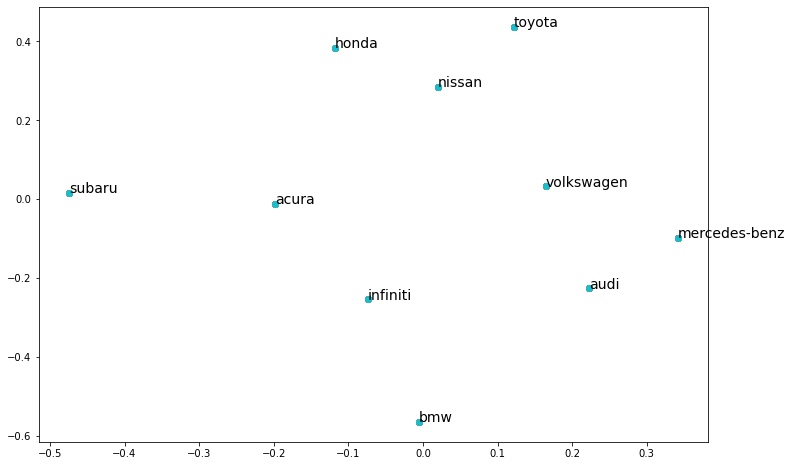

In [103]:
fig, (ax1) = plt.subplots(1,1, figsize=(12,8))

for label in np.unique(brands_10):
        position=dissimilarity==label
        ax1.scatter(npos[:, 0], npos[:, 1])
for i, txt in enumerate(list(dissimilarity)):
    ax1.annotate(txt, (npos[i, 0], npos[i, 1]), size =14)
    

# Task E

#### From the cross tab we can infer the following

#### 1) Audi is highly associated with Mercedes-Benz and Volkswagen
#### 2) Surprisingly Audi has a lower than expected association with BMW as compared to other brands
#### 3) Honda is highly associated with Toyota and Nissan which makes sense as they all make affordable cars

#### 4) Through MDS visualization, we can see three major clusters
####       a) Honda, Toyota, and Nissan are closer to each other which makes sense as they all make affordable cars
####       b) Mercedes-Benz, Audi, and Volkswagen form another cluster as they are premium car brands
####             Note  - However, Volkswagen makes affordable cars but also few premium cars, and hence it is in mid-way between affordable (Toyota, Nissan, and Honda) and premium car brands (Audi and Mercedes)
#### 5) Although Infiniti (Nissan's luxury division) and BMW are closer to each other, surprisingly they are farther away from Audi and Mercedes-Benz given they are also a premium luxury car brand
#### 6) Given that, Acura and Infiniti are luxury divisions of Honda and Nissan respectively, and they are also Japanese makes, they are equidistant from the premium brands and also from the cluster of other Japanese brands. 
#### 7) Surprisingly, BMW is farther away from all the brands

# Task F

In [175]:
# Top 5 features considered basis word frequency
feature_list = ['performance', 'luxury', 'engine', 'price', 'handling']
feature_list

['performance', 'luxury', 'engine', 'price', 'handling']

In [113]:
#calculating lift values with attributes
lift_db_attributes = df_2.apply(pd.Series.explode).set_index(['comment','dt']).reset_index().drop_duplicates()

lift_values_attributes = pd.DataFrame(columns=['word_1','word_2','lift_val'])

for x1 in brands_10:
    for x2 in feature_list[:5]:
        lift_db_attributes['x1'] = 0
        lift_db_attributes['x2'] = 0
        
        lift_db_attributes['x1'][lift_db_attributes['new_comment_tokens'] == x1] = 1
        lift_db_attributes['x2'][lift_db_attributes['new_comment_tokens'] == x2] = 1
        
        c = lift_db_attributes.groupby('comment')[['x1','x2']].sum().reset_index()   
        
        a = lift_db_attributes['x1'].sum()
        b = lift_db_attributes['x2'].sum()
        
        ab = c[(c['x1']==1) & (c['x2']==1)]['x1'].count()
        n = df_2['new_comment_tokens'].count()
        
        lift_val = lift(n, a, b, ab)
        
        app_dict = {}
        app_dict['word_1'] = x1
        app_dict['word_2'] = x2
        app_dict['lift_val'] = lift_val
        
        lift_values_attributes = lift_values_attributes.append(app_dict, ignore_index=True)
        
lift_values_attributes

C:\Users\apk12\AppData\Local\Temp\ipykernel_14524\2405926691.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lift_db_attributes['x1'][lift_db_attributes['new_comment_tokens'] == x1] = 1
C:\Users\apk12\AppData\Local\Temp\ipykernel_14524\2405926691.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lift_db_attributes['x2'][lift_db_attributes['new_comment_tokens'] == x2] = 1
C:\Users\apk12\AppData\Local\Temp\ipykernel_14524\2405926691.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,word_1,word_2,lift_val
0,bmw,performance,1.453185
1,bmw,luxury,1.335604
2,bmw,engine,1.440583
3,bmw,price,1.536014
4,bmw,handling,1.669623
5,acura,performance,1.483195
6,acura,luxury,2.011886
7,acura,engine,1.654321
8,acura,price,1.665917
9,acura,handling,1.574183


In [114]:
lift_values_attributes_ct = pd.crosstab(lift_values_attributes['word_1'], lift_values_attributes['word_2'], lift_values_attributes['lift_val'], aggfunc=np.mean)

lift_values_attributes_ct_1 = lift_values_attributes_ct.copy()
lift_values_attributes_ct_1

word_2,engine,handling,luxury,performance,price
word_1,,,,,
acura,1.654321,1.574183,2.011886,1.483195,1.665917
audi,1.843668,1.492395,1.710940,1.479569,2.199346
bmw,1.440583,1.669623,1.335604,1.453185,1.536014
honda,1.480970,1.535108,1.734360,1.484247,1.877997
infiniti,1.513165,1.295380,1.731972,1.567028,1.673160
mercedes-benz,1.526438,1.367054,1.930617,1.194363,1.280948
nissan,1.640535,1.049456,1.634099,1.298920,1.298027
subaru,1.232949,1.003827,3.326027,1.754040,1.410899
toyota,1.770271,1.939619,2.418575,1.449005,1.630962


#### The above crosstab shows the lift values between the top 10 brands and the top 5 attributes.

# Task G

### Based on the above crosstab we can infer the below -

### 1) Audi is most strongly associated with Engine which intuitively also makes sense as "Power" is a key trait they exhibit in their advertisement campaigns as well. Also, Audi is second most associated with Price and that might be due to the their high prices; so Audi needs to do a better job in justofying their high costs. 

### 2) People refer to Toyota a lot when talking about Handling. Toyota stands just behind Audi in terms of Association with Engine. Toyota should use Handling and Engine to advertise better to beat the competitors in the Affordable segment. Subaru and Nissan are least associated with Handling which this gives the 2 companies areas to make improvements in.

### 3) Surprisingly, Subaru is the most associated brand with luxury. However, this might be happening as Subaru owners want/ aspire to buy luxury cars. 

### 4) Volkswagen is most associated with Price as they have different models ranging from a lower price range to luxury models in the higher price bracket, making each model priced right, which might be leading to the strong association as each segment of customers have an option. They are also stringly associated with luxury meaning the people are fond of the high end models within Volkswagen.


In [240]:
# Words used to indicate an "Aspirational" comment

aspiration_list  = ['want', 'hope', 'wish', 'hopefully', 'desire', 'dream', 'aspire', 'aimed', 'dreams', 'aim', 'aspiration', 'aspirations', 'love']
aspiration_list

['want',
 'hope',
 'wish',
 'hopefully',
 'desire',
 'dream',
 'aspire',
 'aimed',
 'dreams',
 'aim',
 'aspiration',
 'aspirations',
 'love']

In [241]:
#clculating lift values with aspirational words
lift_db_aspiration = df_2.apply(pd.Series.explode).set_index(['comment','dt']).reset_index().drop_duplicates()

lift_db_aspiration.loc[lift_db_aspiration['new_comment_tokens'].isin(aspiration_list),'aspiration_word'] = 'aspiration'

lift_values_aspiration = pd.DataFrame(columns=['word_1','word_2','lift_val'])

for x1 in brands_10:
    for x2 in ['aspiration','non_aspiration']:
        lift_db_aspiration['x1'] = 0
        lift_db_aspiration['x2'] = 0
        
        lift_db_aspiration['x1'][lift_db_aspiration['new_comment_tokens'] == x1] = 1
        lift_db_aspiration['x2'][lift_db_aspiration['aspiration_word'] == x2] = 1
        
        c = lift_db_aspiration.groupby('comment')[['x1','x2']].sum().reset_index()   
        
        a = lift_db_aspiration['x1'].sum()
        b = lift_db_aspiration['x2'].sum()
        
        ab = c[(c['x1']==1) & (c['x2']==1)]['x1'].count()
        n = df_2['new_comment_tokens'].count()
        
        lift_val = lift(n, a, b, ab)
        
        app_dict = {}
        app_dict['word_1'] = x1
        app_dict['word_2'] = x2
        app_dict['lift_val'] = lift_val
        
        lift_values_aspiration = lift_values_aspiration.append(app_dict, ignore_index=True)
        
lift_values_aspiration_ct = pd.crosstab(lift_values_aspiration['word_1'], lift_values_aspiration['word_2'], lift_values_aspiration['lift_val'], aggfunc=np.mean)

lift_values_aspiration_ct_1 = lift_values_aspiration_ct.copy()
lift_values_aspiration_ct_1 = lift_values_aspiration_ct_1.reset_index()
lift_values_aspiration_ct_1

C:\Users\apk12\AppData\Local\Temp\ipykernel_14524\737528554.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lift_db_aspiration['x1'][lift_db_aspiration['new_comment_tokens'] == x1] = 1
C:\Users\apk12\AppData\Local\Temp\ipykernel_14524\737528554.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lift_db_aspiration['x2'][lift_db_aspiration['aspiration_word'] == x2] = 1
C:\Users\apk12\AppData\Local\Temp\ipykernel_14524\737528554.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

word_2,word_1,aspiration
0,acura,1.077449
1,audi,0.993128
2,bmw,1.077323
3,honda,1.086007
4,infiniti,1.249091
5,mercedes-benz,0.996810
6,nissan,1.123420
7,subaru,1.121296
8,toyota,1.083298
9,volkswagen,1.237011


In [245]:
lift_db_aspiration = df_2.apply(pd.Series.explode).set_index(['comment','dt']).reset_index().drop_duplicates()
lift_db_aspiration.loc[lift_db_aspiration['new_comment_tokens'].isin(aspiration_list),'aspiration_word'] = 'aspiration'
lift_db_aspiration['aspiration_flag'] = 0
lift_db_aspiration.loc[lift_db_aspiration['aspiration_word']=='aspiration','aspiration_flag'] = 1

lift_db_aspiration.groupby('comment')[['aspiration_flag']].sum().sort_values(by='aspiration_flag', ascending=False).reset_index()

#for b in brands10:

def check_brand(x,b):
    a = x.find(b)
    if a == -1:
        return 0
    else:
        return 1

for b in brands_10:
    lift_db_aspiration[b] =lift_db_aspiration['comment'].apply(lambda x : check_brand(x,b)) 

lift_db_aspiration_2 = lift_db_aspiration.copy()
lift_db_aspiration_2.drop(columns=['new_comment_tokens', 'aspiration_word'],inplace=True)
lift_db_aspiration_3 = lift_db_aspiration_2[['aspiration_flag','comment']].groupby('comment').max('aspiration_flag').reset_index()

lift_db_aspiration_2.drop(columns='aspiration_flag',inplace=True)
lift_db_aspiration_4 = lift_db_aspiration_2.drop_duplicates().copy()
lift_db_aspiration_4 = lift_db_aspiration_4.merge(lift_db_aspiration_3, how='left', on='comment')

total_count = []
aspirational_count = []

for b in brands_10:
    tot_count = lift_db_aspiration_4[b].sum()
    asp_count = lift_db_aspiration_4.loc[lift_db_aspiration_4[b]==1, 'aspiration_flag'].sum()
    
    total_count.append(tot_count)
    aspirational_count.append(asp_count)
    
brand_count_df = pd.DataFrame(list(zip(brands_10, total_count,aspirational_count)),columns = ['brand','brand_count','aspiration_count'])
brand_count_df['perc_aspiration'] = brand_count_df['aspiration_count']/brand_count_df['brand_count']

brand_merge = brand_count_df.merge(lift_values_aspiration_ct_1, left_on = 'brand', right_on = 'word_1')[['brand','brand_count','aspiration_count','perc_aspiration','aspiration']]
brand_merge

,brand,brand_count,aspiration_count,perc_aspiration,aspiration
0,bmw,1461,373,0.255305,1.077323
1,acura,624,164,0.262821,1.077449
2,honda,611,164,0.268412,1.086007
3,audi,497,125,0.251509,0.993128
4,infiniti,423,131,0.309693,1.249091
5,toyota,1409,349,0.247693,1.083298
6,nissan,383,103,0.268930,1.123420
7,mercedes-benz,230,50,0.217391,0.996810
8,subaru,252,65,0.257937,1.121296
9,volkswagen,214,75,0.350467,1.237011


### We have defined a comment to be aspirational towards a brand if the comment includes any of the below words -
### 'want', 'hope', 'wish', 'hopefully', 'desire', 'dream', 'aspire', 'dreams', 'aim', 'aspiration', 'aspirations', 'love'

### We then calculated the association of the occurance of such words with each brand to understand "Aspiration".

### We also looked at the percentage of comments of each brand with words reflecting "Aspiration" to understand if there is an aspiration to buy their cars.


### We see that Volkswagen and Infiniti have the highest aspiration_lift illustarting that the people aspire for affordable brands where they can get good value for their money. However, an important point to note here is that the number of aspirational mentions and total comments for these brands are relatively lower (thus, the high % aspirational comments) which might be the reason for higher lifts when compared to a luxury brand (For example BMW). A recommendation to the companies here can be to try and increase their customer base as the customers familar with the brand already like them better.

### Surprisingly, Audi and Mercedes have lower association with aspirational words, indicating that while these are luxury brands, people still aspire to own a  BMW from the same luxury bracket. People might be feeling that the high prices that they are paying for a luxury car, their investment would be better in the case of BMW. So Audi and Mercedes need to justify to their customers the value that they will be getting for the high prices. We had also seen earlier that Audi was highly associated with Price, so the company needs to justify the price using their valuable attributes such as Engine and Luxury. Additionally, Mercedes should also work on improving its reach as not a lot of customers are talking about them.

### Honda and Toyota should also work on advertising themselves as better brands in the affordable segment as inspite the high number of comments, their lift with aspiration is low.